In [2]:
import pandas as pd
from pathlib import Path
import statistics
import matplotlib.pyplot as plt
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import timedelta
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os

In [3]:
df=pd.read_csv('C:/Users/euzoe/OneDrive/Desktop/DATA ANALYSIS/MY_PROJECTS/heart.csv')

In [5]:
df.head()

,age,sex,sex_def,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target_def
0,63,1,male,3,145,233,1,0,150,0,2.3,0,0,1,1,yes
1,37,1,male,2,130,250,0,1,187,0,3.5,0,0,2,1,yes
2,41,0,female,1,130,204,0,0,172,0,1.4,2,0,2,1,yes
3,56,1,male,1,120,236,0,1,178,0,0.8,2,0,2,1,yes
4,57,0,female,0,120,354,0,1,163,1,0.6,2,0,2,1,yes


In [6]:
df.isnull().sum()

age           0
sex           0
sex_def       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
target_def    0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [24]:
df.shape

(303, 14)

In [86]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [87]:
df.shape

(303, 14)

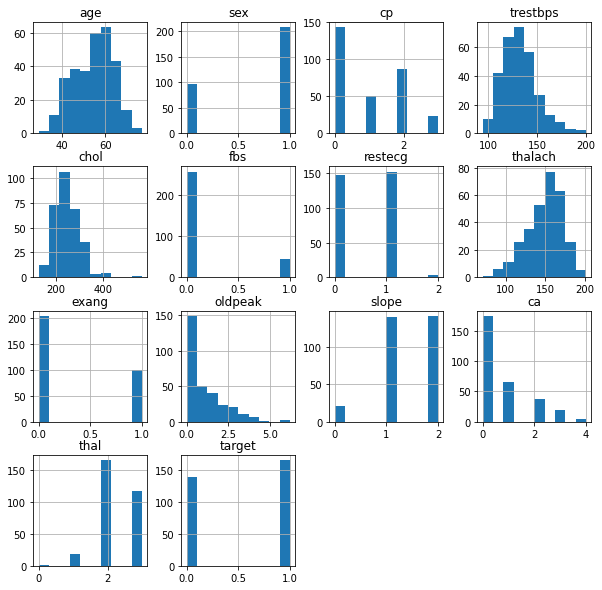

In [88]:
df.hist(figsize=(10,10))
plt.show()

In [89]:
#Question 1
#What is the percentage of patients who have heart disease?

heart_disease=df.loc[df['target'] == 1]

In [90]:
heart_disease.count()

age         165
sex         165
cp          165
trestbps    165
chol        165
fbs         165
restecg     165
thalach     165
exang       165
oldpeak     165
slope       165
ca          165
thal        165
target      165
dtype: int64

In [91]:
count=df.target.value_counts()
count

1    165
0    138
Name: target, dtype: int64

In [110]:
total=df.target.count()

In [111]:
perc=count/total*100
perc

1    54.455446
0    45.544554
Name: target, dtype: float64

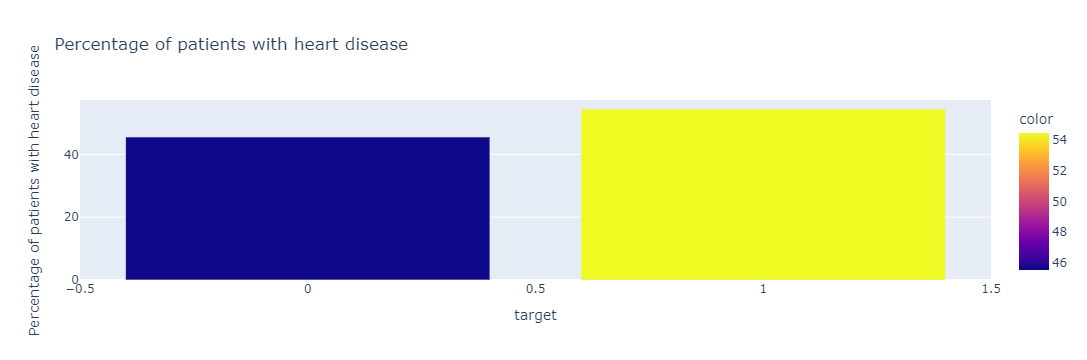

In [127]:
fig=px.bar(perc, y=perc, color=perc, labels={'y':'Percentage of patients with heart disease', 'index':'target'}, title='Percentage of patients with heart disease')
fig.show()

In [ ]:
#OR

count=df.target.value_counts()
count

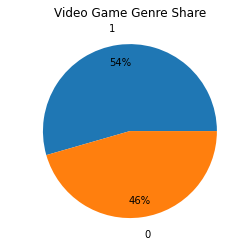

In [104]:
plt.pie(count, labels=count.index, autopct='%.0f%%', pctdistance=0.8, labeldistance=1.2)
plt.title('Video Game Genre Share')
plt.ylabel(' ')
plt.show()

In [124]:
#OR

percentage=df.target.value_counts(normalize=True)*100
percentage

1    54.455446
0    45.544554
Name: target, dtype: float64

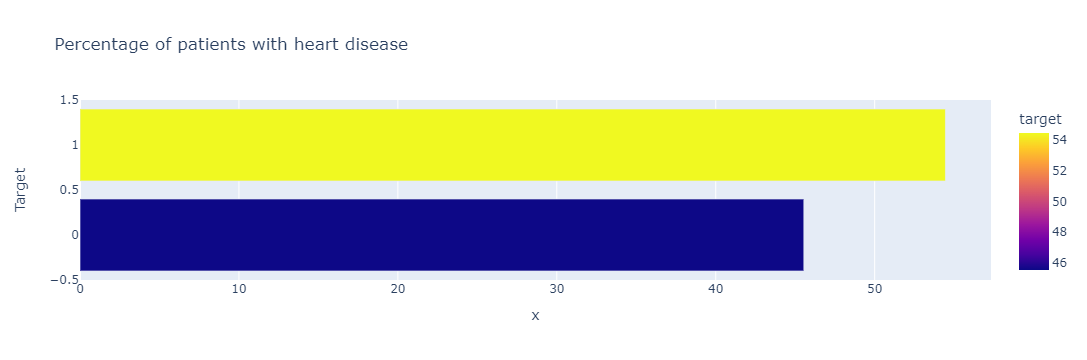

In [132]:
fig=px.bar(percentage, x=percentage, title='Percentage of patients with heart disease', labels={'y':'Percentage', 'index':'Target'}, color='target')
fig.show()

In [5]:
pd.crosstab(df.sex, df.target)


target,0,1
sex,,
0,24,72
1,114,93


<AxesSubplot:ylabel='Density'>

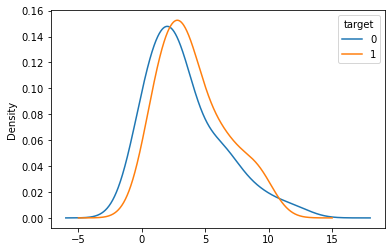

In [135]:
pd.crosstab(df.age, df.target).plot(kind='kde')

In [139]:
#Question 2
#What is the ratio of male to female patients who have heart disease?

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [170]:
yes=df.loc[df['target']==1]
yes

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [179]:
yes_grp=df.groupby('target')
yes_grp

In [243]:
yes_grp=f.get_group(1)
yes_grp

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [201]:
ratio=yes_grp.groupby(['sex'])

In [202]:
ratio=ratio.size()
ratio

sex
0    72
1    93
dtype: int64

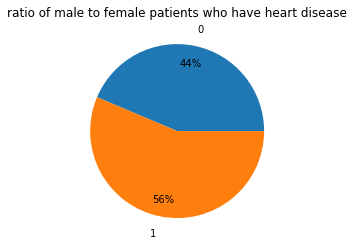

In [213]:
plt.pie(ratio, labels=ratio.index, autopct='%.0f%%', pctdistance=0.8, labeldistance=1.2)
plt.title('ratio of male to female patients who have heart disease')
plt.ylabel(' ')
plt.show()

In [214]:
#Question 3
#Does age play a role in heart disease? What is the average age when heart diseases among the patients have spiked up?

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [224]:
#pd.crosstab(df.age, df.target)

In [276]:
ag=df.groupby(['target']) [['age']].mean().sort_values(by=['age'], ascending=False).reset_index()
ag

,target,age
0,0,56.601449
1,1,52.496970


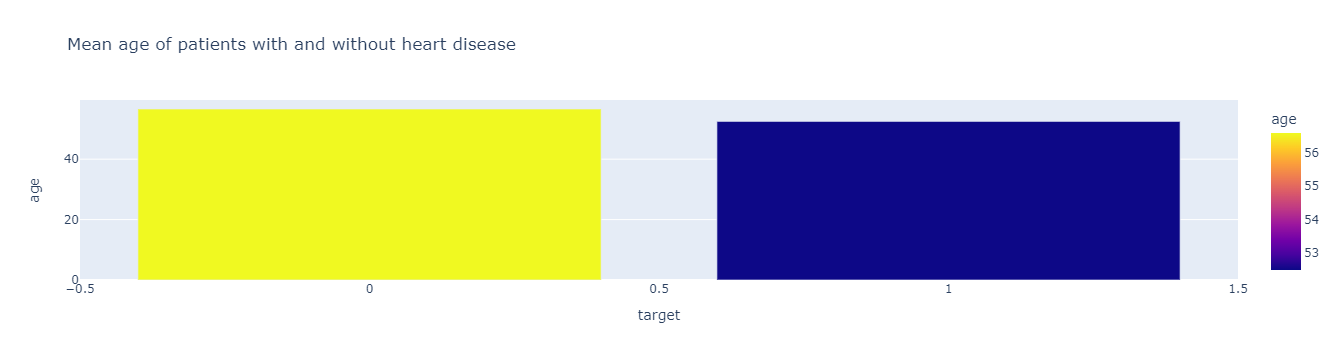

In [297]:
fig=px.bar(ag, x='target', y='age', color='age', title='Mean age of patients with and without heart disease')
fig.show()

<AxesSubplot:title={'center':'Mean age of patients with and without heart disease'}, xlabel='target'>

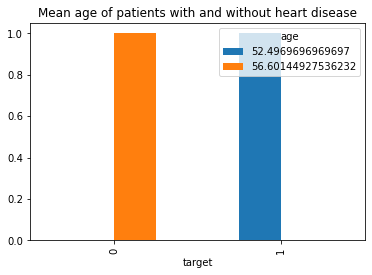

In [286]:
pd.crosstab(ag.target, ag.age).plot(kind='bar', title='Mean age of patients with and without heart disease')

<AxesSubplot:xlabel='age'>

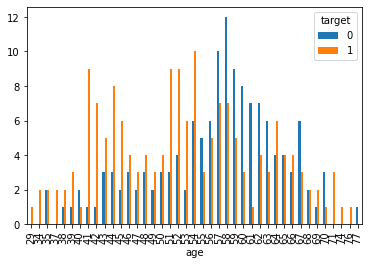

In [310]:
#b- What is the average age when heart diseases among the patients have spiked up?

jen=pd.crosstab(df.age, df.target).plot(kind='bar')
jen

In [333]:
je=df.loc[df['target']==1]
je

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [320]:
obi=je.groupby('age').size()
obi

age
29     1
34     2
35     2
37     2
38     2
39     3
40     1
41     9
42     7
43     5
44     8
45     6
46     4
47     3
48     4
49     3
50     4
51     9
52     9
53     6
54    10
55     3
56     5
57     7
58     7
59     5
60     3
61     1
62     4
63     3
64     6
65     4
66     4
67     3
68     2
69     2
70     1
71     3
74     1
76     1
dtype: int64

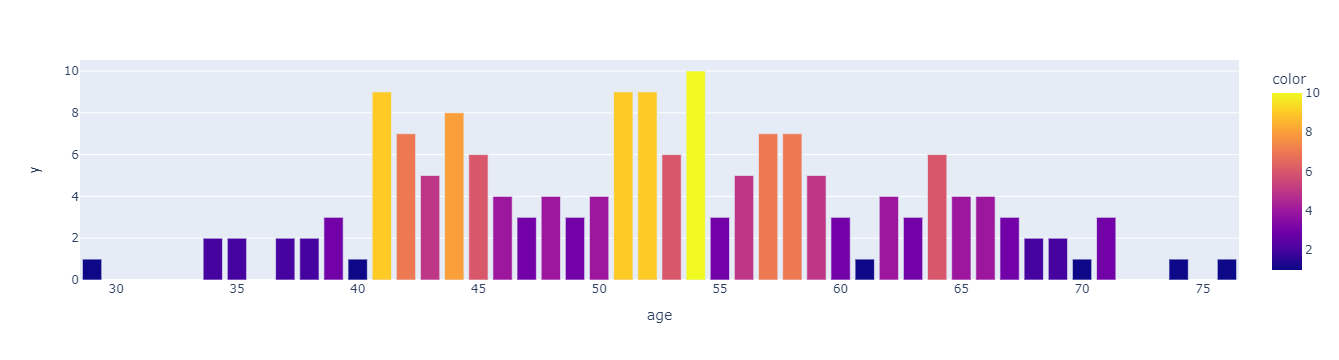

In [327]:
fig=px.bar(obi, y=obi, color=obi)
fig.show()

In [328]:
obi2=je.groupby('age').size().sort_values(ascending=False).reset_index()
obi2

,age,0
0,54,10
1,41,9
2,51,9
3,52,9
4,44,8
5,57,7
6,58,7
7,42,7
8,53,6
9,45,6


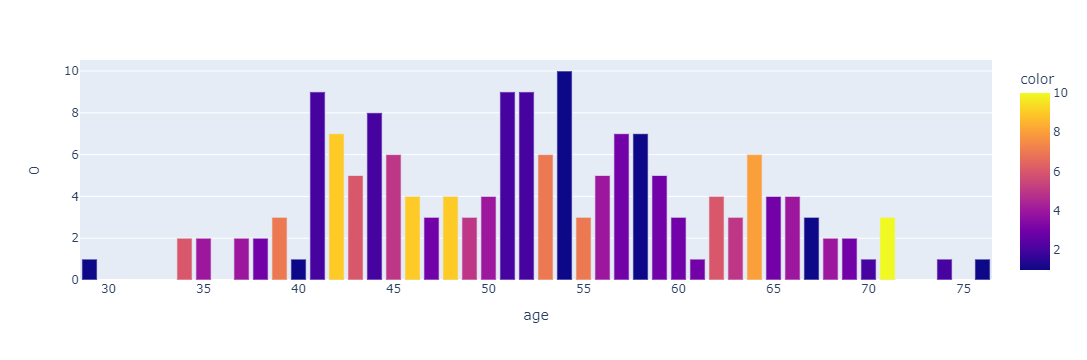

In [373]:
fig=px.bar(obi2, y=0, x='age', color=obi)
fig.show()

In [377]:
#Question 4
#When there is too much cholesterol in your blood, it builds up in the walls of your arteries, causing heart diseases. 
#Can you back this up with the data? What is the average cholesterol levels of patients with heart diseases?

cho=df.groupby(['target']) [['chol']].mean().sort_values(by=['chol'], ascending=False).reset_index()
cho

,target,chol
0,0,251.086957
1,1,242.230303


In [368]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


<AxesSubplot:>

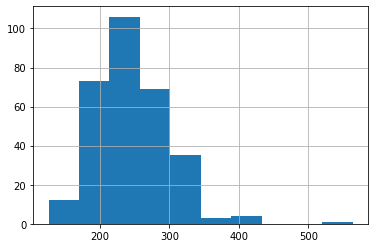

In [369]:
df.chol.hist()

In [378]:
df.chol.mean()

246.26402640264027

In [380]:
round(4.36)

4